In [1]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

2.8.0+cu128
True


In [2]:
import numpy as np
import os

data_dir = "/media/sparsh/CaptainSlow/Programming Stuff/Programming Stuff/Code _n_ Stuff/All Projects/All Projects/Mind Wandering 2/Mind Wandering Durinng Live Lectures dataset"
file_0 = os.path.join(data_dir + "/MWEEG_Subject_4.npz")


In [3]:
sub_0 = np.load(file_0)
print(sub_0.keys())


KeysView(NpzFile '/media/sparsh/CaptainSlow/Programming Stuff/Programming Stuff/Code _n_ Stuff/All Projects/All Projects/Mind Wandering 2/Mind Wandering Durinng Live Lectures dataset/MWEEG_Subject_4.npz' with keys: EEG, TriggerValues, SampleTime, TriggerTime)


In [4]:
for i in sub_0.files:
    print(i, sub_0[i].shape)

EEG (16, 1019626)
TriggerValues (13,)
SampleTime (1019626,)
TriggerTime (1019626,)


In [5]:
eeg = sub_0['EEG']

triggervalues = sub_0['TriggerValues']
sampletimes = sub_0['SampleTime']
triggertime = sub_0['TriggerTime']
print(eeg.shape)
print(triggervalues.shape)
print(sampletimes.shape)
print(triggertime.shape)
print("eeg min, max, mean:", float(eeg.min()), float(eeg.max()), float(eeg.mean()))
eeg = eeg - eeg.mean(axis = 1, keepdims = True)

(16, 1019626)
(13,)
(1019626,)
(1019626,)
eeg min, max, mean: -127135.1875 78860.4765625 -0.003959251875203771


In [6]:
fs = 1024
n_channels = eeg.shape[0]
ch_names = ["Fpz", "Fp1", "Fp2", "F7", "F8", "F3", "F4", "T7", "T8", "C3", "C4","P7", "P8", "O1", "O2", "Oz"]
ch_types = ["eeg"] * n_channels

Creating RawArray with float64 data, n_channels=16, n_times=1019626
    Range : 0 ... 1019625 =      0.000 ...   995.728 secs
Ready.
<RawArray | 16 x 1019626 (995.7 s), ~124.5 MiB, data loaded>
Using matplotlib as 2D backend.


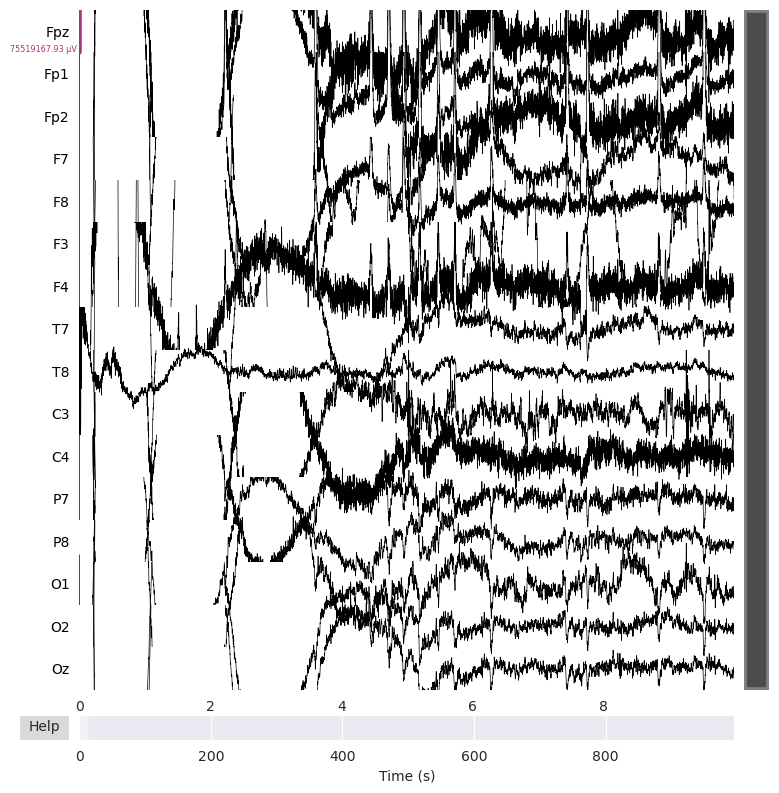

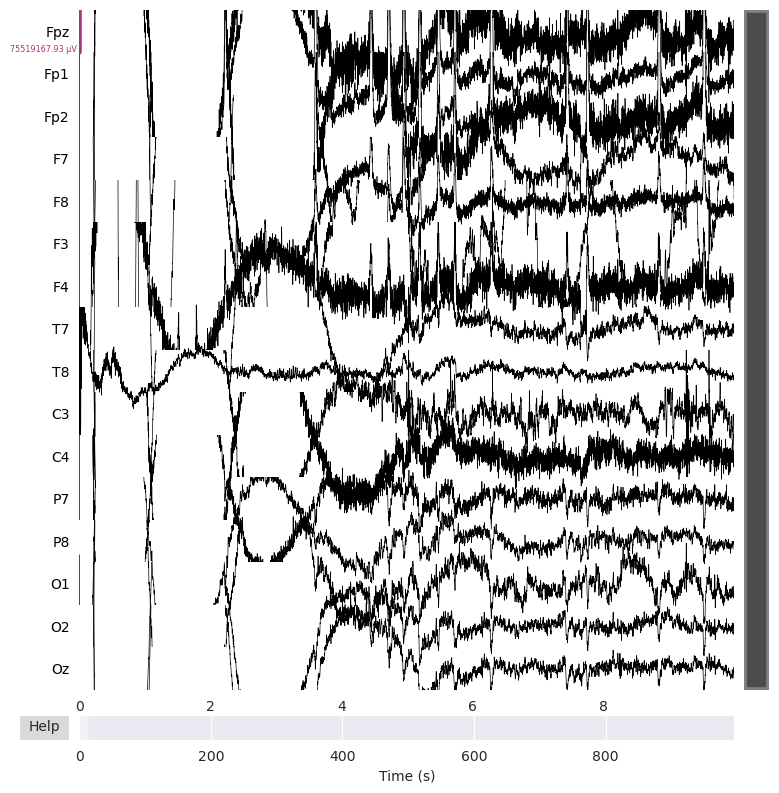

In [7]:
import mne

info = mne.create_info(ch_names, sfreq=fs, ch_types=ch_types)
raw = mne.io.RawArray(eeg, info)
print(raw)
raw.plot(title="EEG Signals", scalings='auto')

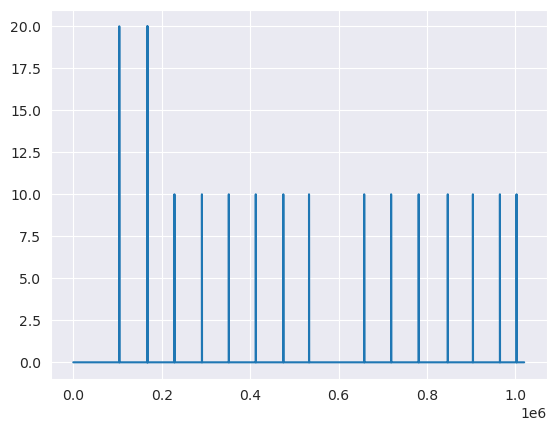

In [8]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(triggertime))], triggertime)
plt.show()
# print(triggertime)

In [9]:
len(triggertime)/1024

995.728515625

In [10]:
trigger_indices = np.where(triggertime != 0)[0]
n = min(len(trigger_indices), len(triggervalues))
trigger_indices = trigger_indices[:n]
triggervalues = triggervalues[:n]

In [21]:
len(trigger_indices)

16

In [11]:
events = np.column_stack((trigger_indices, np.zeros(len(trigger_indices), dtype=int), triggervalues.astype(int)))
events

array([[104048,      0,      1],
       [167088,      0,      1],
       [168232,      0,      2],
       [228784,      0,      1],
       [290920,      0,      1],
       [351728,      0,      1],
       [412704,      0,      1],
       [474960,      0,      1],
       [533096,      0,      1],
       [657865,      0,      2],
       [718737,      0,      1],
       [781105,      0,      2],
       [846857,      0,      1]])

Effective window size : 2.000 (s)
Plotting power spectral density (dB=True).


/tmp/ipykernel_41099/2819079179.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax = 100).plot()
/home/sparsh/miniconda3/envs/pytorch_env/lib/python3.11/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


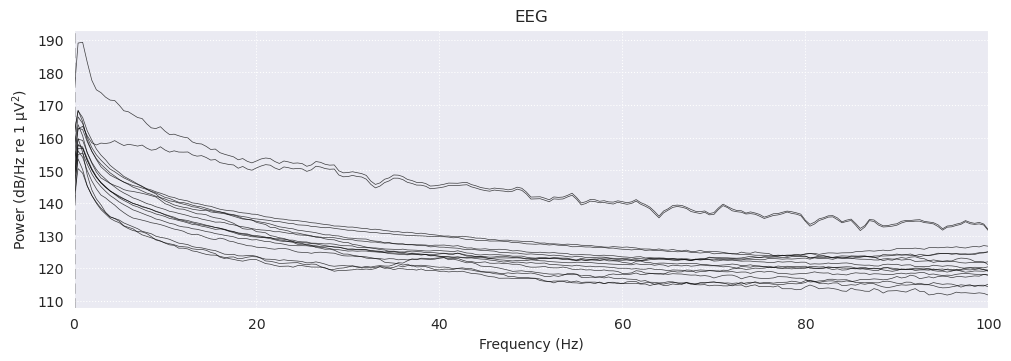

In [12]:
raw.compute_psd(fmax = 100).plot()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 3381 samples (3.302 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edg

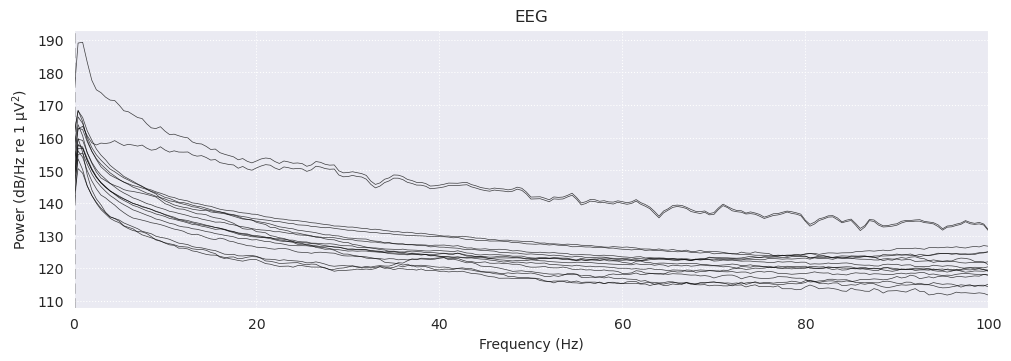

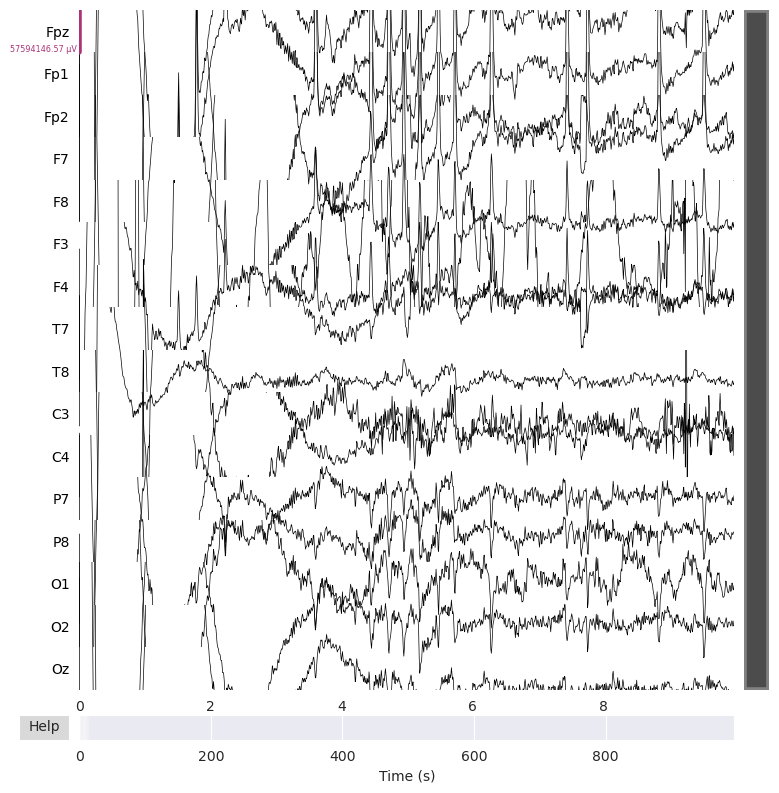

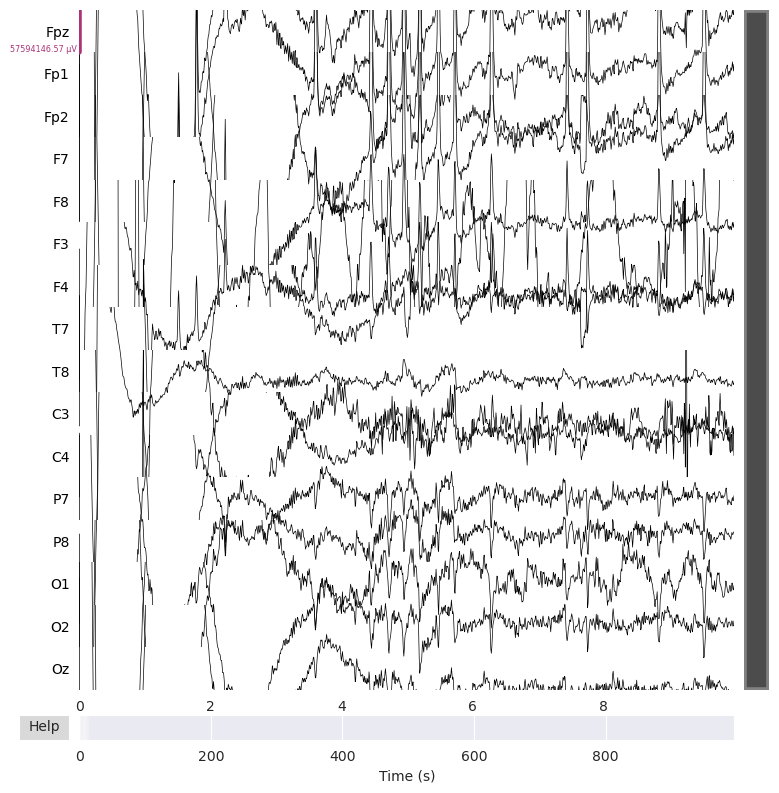

In [13]:
raw.filter(1, 40)  # will keep 1-40 hz
raw.notch_filter(freqs=50) # power line noise ka interference hai ye
raw.plot(title="Filtered EEG", scalings='auto')


Effective window size : 2.000 (s)
Plotting power spectral density (dB=True).


/tmp/ipykernel_41099/2819079179.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax = 100).plot()
/home/sparsh/miniconda3/envs/pytorch_env/lib/python3.11/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


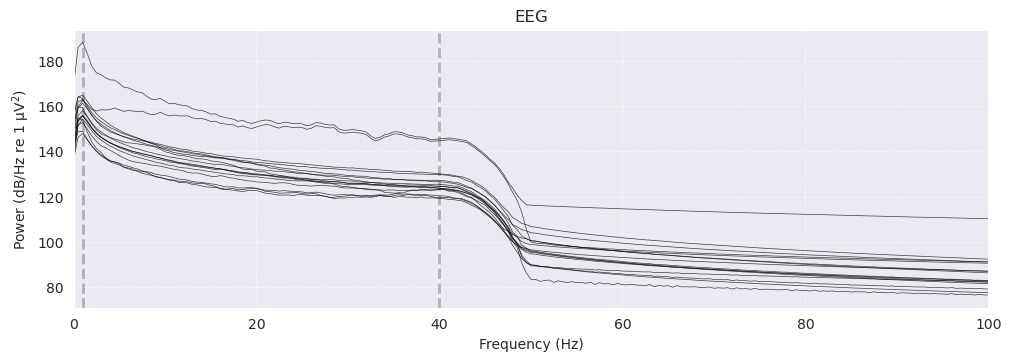

In [14]:
raw.compute_psd(fmax = 100).plot()

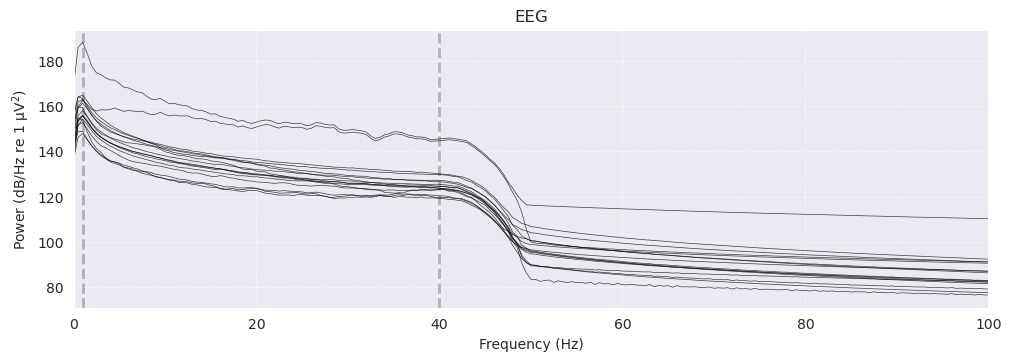

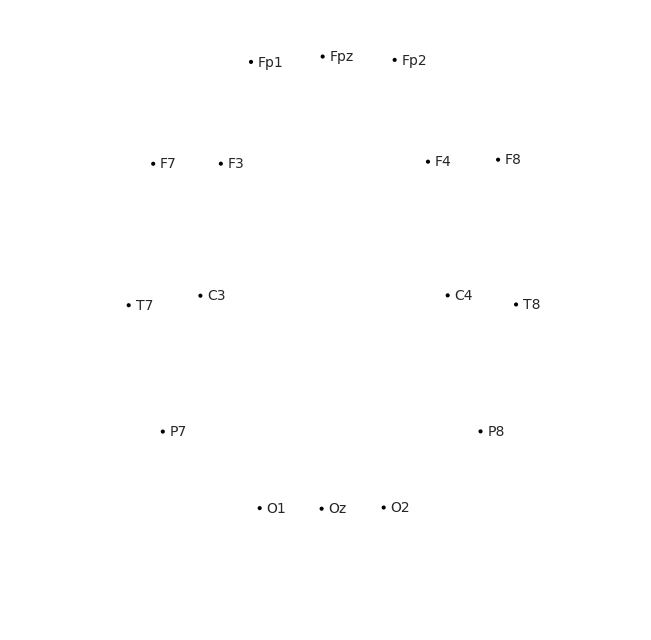

In [15]:
# Set the standard 10-20 montage
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

# You can now plot the sensor locations to verify they are correct
raw.plot_sensors(ch_type='eeg', show_names=True)
plt.show()

Fitting ICA to data using 16 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 6.3s.


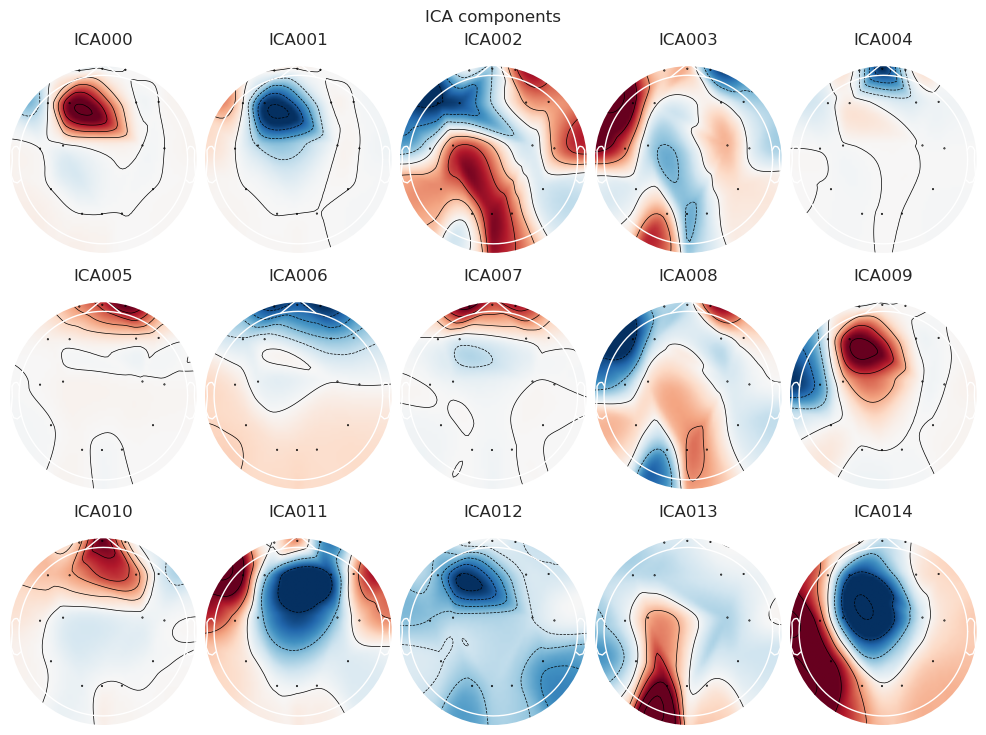

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 2 ICA components
    Projecting back using 16 PCA components


In [16]:
ica = mne.preprocessing.ICA(n_components=15, random_state=97)
ica.fit(raw)
ica.plot_components()  # visually select components to remove
ica.exclude = [0, 1]   # example: components causing blink/muscle artifact
raw = ica.apply(raw)


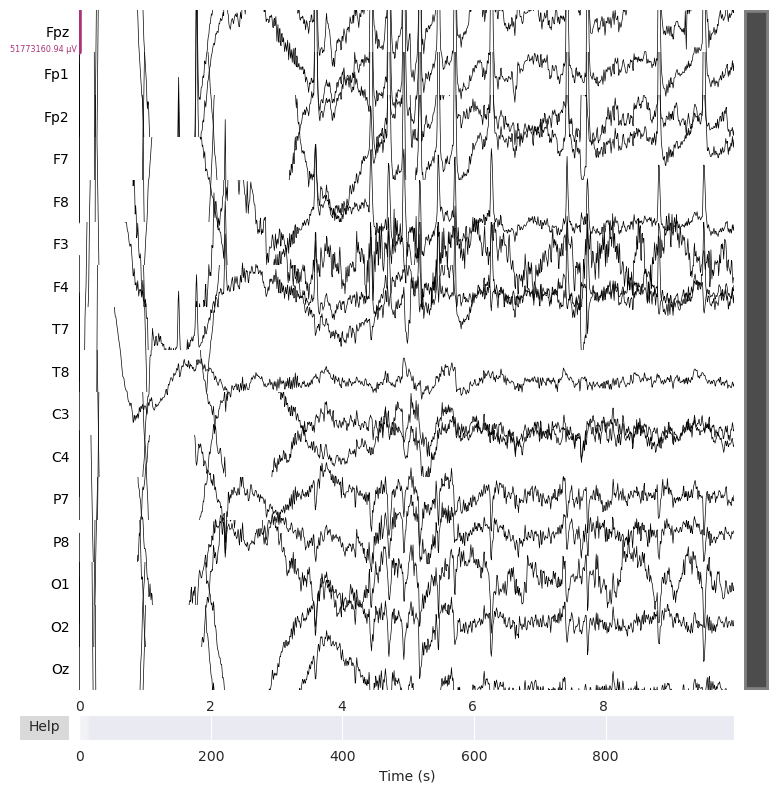

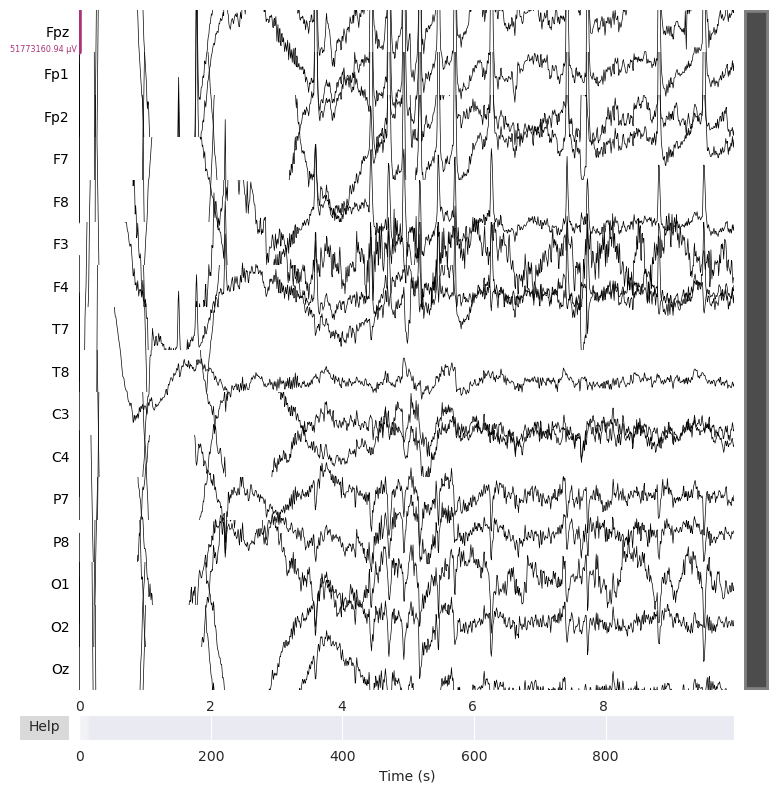

In [17]:
raw.plot(title="Filtered EEG", scalings='auto')

In [18]:
raw.set_eeg_reference('average', projection=True)


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


<RawArray | 16 x 1019626 (995.7 s), ~124.5 MiB, data loaded>

In [20]:
# Map triggers
trigger_indices = np.where(triggertime != 0)[0]
events = np.column_stack((trigger_indices, np.zeros(len(trigger_indices), dtype=int), triggervalues.astype(int)))

# Create epochs around events (-0.2 to 0.8 sec)
epochs = mne.Epochs(raw, events, event_id=None, tmin=-0.2, tmax=0.8, baseline=(None,0), preload=True)


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 16 and the array at index 2 has size 13